#### Import Libraries

In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold



### Question 1

In [2]:
df = pd.read_csv('./Laterality.csv')

df.head(5)

,Number,seizure_Simiology_Laterality,Laterality_ictal_EEG,ictal_Epileptogenic_zone,interictal_irritative_zone,MRI_findings,Hipp_Vol_LI,hippocampal volume,Hipp_FLAIR_LI,FLAIR signal intensity,...,FA cingulum,Fx_LI,FA fornix,Hipp_MD_LI,hippMD,Logistic prediction,Side_ C4.5 Decision Tree,Handedness,gender,Overall_Laterality_NO
0,1,L,L,L,UL,L,-0.050890,UL,-0.212758,L,...,UR,0.0506,R,-0.000163,L,L,L,L,female,0
1,2,L,L,L,UR,L,-0.084469,L,-0.326595,L,...,L,0.0208,UR,-0.000138,L,L,L,R,female,0
2,3,U,UL,L,U,UR,-0.000530,U,0.266374,R,...,UL,-0.0379,L,-0.000024,UL,U,L,R,female,0
3,4,U,UL,L,UL,L,-0.082927,L,-0.524212,L,...,L,-0.0175,UL,-0.000362,L,L,L,R,male,0
4,5,U,R,R,R,R,-0.007018,U,0.239003,R,...,UL,0.0551,R,0.000176,R,R,R,R,male,1


In [10]:
y = df['Overall_Laterality_NO']
x = pd.get_dummies(df).drop('Overall_Laterality_NO', axis=1).to_numpy()

In [13]:
clf = AdaBoostClassifier(n_estimators=100)

clf.fit(x, y)

AdaBoostClassifier(n_estimators=100)

In [28]:
from sklearn.model_selection import KFold

fold_k = [3, 7, 10]


for fold in fold_k:
    kf = KFold(n_splits=fold)
    acc = 0
    for train_idx, test_idx in kf.split(X=x):
        clf = AdaBoostClassifier(n_estimators=100)
        
        clf.fit(x[train_idx], y[train_idx])
        acc += clf.score(x[test_idx], y[test_idx])
        
    print(f"Mean accuracy when doing {fold} folds: {acc / fold * 100}%")

0.9166666666666666
0.9166666666666666
0.9090909090909091
Mean accuracy when doing 3 folds: 91.4141414141414%
1.0
0.6
0.8
0.8
0.8
0.8
0.8
Mean accuracy when doing 7 folds: 80.0%
1.0
1.0
1.0
0.75
0.75
0.6666666666666666
1.0
0.6666666666666666
1.0
1.0
Mean accuracy when doing 10 folds: 88.33333333333334%


### Question 2

In [4]:
df = pd.read_csv('./COVID_Dataset.csv')

df.head(5)

y = df['Infection']
x = df.drop('Infection', axis=1).to_numpy()

In [6]:
x.shape

(80000, 106)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [20]:
adaBoost_clf = AdaBoostClassifier()

adaBoost_clf.fit(X_train, Y_train)

preds = adaBoost_clf.predict(X_test)

Accuracy: 0.7525
Precision: 0.6939692044482464
Rcall: 0.479745712596097


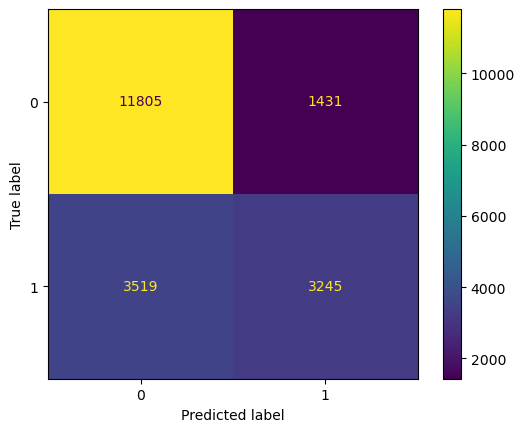

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score

accuracy = accuracy_score(Y_test, preds)
precision = precision_score(Y_test, preds)
recall = recall_score(Y_test, preds)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Rcall: {recall}")

ConfusionMatrixDisplay.from_predictions(Y_test, preds)

Because of the low recall we can understand that there are a lot of covid cases that are classifier will not detect. Which is dangerous!

In [17]:
from sklearn.tree import DecisionTreeClassifier

adaBoost_clf = DecisionTreeClassifier()

adaBoost_clf.fit(X_train, Y_train)

preds = adaBoost_clf.predict(X_test)

Accuracy: 0.73415
Precision: 0.6072964555835682
Rcall: 0.605410999408634


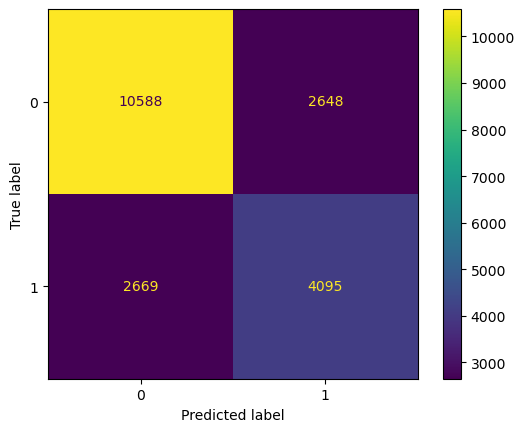

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

accuracy = accuracy_score(Y_test, preds)
precision = precision_score(Y_test, preds)
recall = recall_score(Y_test, preds)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Rcall: {recall}")

ConfusionMatrixDisplay.from_predictions(Y_test, preds)

Higher recall and lower precision means that using this predictor might cost us more because of unnecessary drug costs. But this will come with the benefit of less death.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_clf = KNeighborsClassifier(n_neighbors=2)

k_neighbors_clf.fit(X_train, Y_train)

preds = k_neighbors_clf.predict(X_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

accuracy = accuracy_score(Y_test, preds)
precision = precision_score(Y_test, preds)
recall = recall_score(Y_test, preds)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Rcall: {recall}")

ConfusionMatrixDisplay.from_predictions(Y_test, preds)